In [1]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,TensorDataset
import torch.optim as optim
import torchvision

from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import torchvision.transforms as transforms

In [2]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
train_dataset=torchvision.datasets.CIFAR10(
    root="./data",
    download=True,
    train=True,
    transform=transform
)
test_dataset=torchvision.datasets.CIFAR10(
    root="./data",
    download=True,
    train=False,
    transform=transform
)


In [15]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
train_dataset[0]

(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
          [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
          [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
          ...,
          [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
          [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
          [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],
 
         [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
          [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
          [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
          ...,
          [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
          [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
          [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],
 
         [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
          [-0.8431, -1.0000,

In [4]:
train_loader=DataLoader(train_dataset,batch_size=100,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=100,shuffle=False)

In [5]:
for image,label in train_loader:
    print(image.shape)
    print(label.shape)
    break

torch.Size([100, 3, 32, 32])
torch.Size([100])


In [6]:
image[0].shape

torch.Size([3, 32, 32])

In [7]:
label[0].shape

torch.Size([])

In [8]:
label[0]

tensor(0)

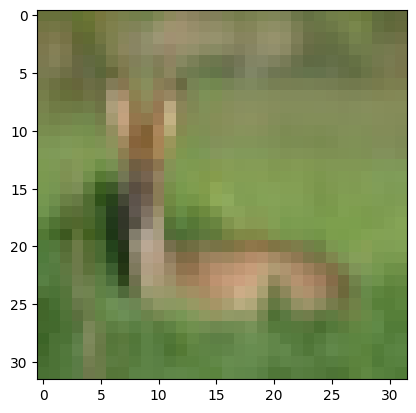

In [9]:
img=image[2]
img=img/2 +0.5
img = img.permute(1, 2, 0)  # CHW → HWC
plt.imshow(img)
#plt.axis("off")
plt.show()

In [10]:
classes=("plane","car","bird","cat","deer",
         "dog","frog","horse","ship","truck"
        )

In [11]:
classes[label[2]]

'deer'

In [19]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Conv2d(3,32,kernel_size=(3,3),padding="same"), #output(32,32,32)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2),stride=(2,2)),  #output(32,16,16)

            nn.Conv2d(32,64,kernel_size=(3,3)), # output(64,14,14)->bcoz of no padding
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2),stride=(2,2)) #output(64,7,7)

        )
        self.fc_layers=nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*7*7,600),
            nn.ReLU(),
            nn.Linear(600,120),
            nn.ReLU(),
            nn.Linear(120,10),
        )
    def forward(self,x):
        x=self.network(x)
        x=self.fc_layers(x) 
        return x

In [21]:
model=CNN().to(device)
criterion=nn.CrossEntropyLoss()
optimiser=optim.Adam(model.parameters(),lr=0.001)

In [ ]:
epochs=10
train_loss=[]
for epoch in range(epochs):
    model.train()
    l=0.0
    for images,labels in train_loader:
        images=images.to(device)
        labels=labels.to(device)
        optimiser.zero_grad()
        output=model(images)

        loss=criterion(output,labels)

        loss.backward()
        optimiser.step()
        l +=loss.item()
    print(epoch," ",(l/len(train_loader)))

model.eval()
y_true,y_pred=[],[]
for images,labels in test_loader:
    images=images.to(device)
    labels=labels.to(device)
    output=model(images)
    _,pred=torch.max(output,1)
    y_true.extend(labels.cpu().numpy())
    y_pred.extend(pred.cpu().numpy())
print(accuracy_score(y_true,y_pred))

0   1.3849724284410476
1   0.9691160823106766
